## K-Means 

Clustering of Football Clubs: You are given a dataset containing football
player information. The objective is to cluster different football clubs based on various attributes.

1. Your initial step should be extracting the club information from the player dataset. It will involve computing the “average player” of each club. One way is to group the dataset by “club name id” and calculate the mean values for all relevant features. You are encouraged to explore different ideas.

2. Now, use K-Means to cluster the football clubs. You can determine the criteria for clustering by considering various features. For example - First try clustering using all features, after that try again using only features representing player stats or financial attributes.

3. To find the optimal number of clusters, K, you can use the elbow method.

In [26]:
import pandas as pd
import numpy as np
import datapurifier as dp
from datapurifier import Mleda, MlReport

In [27]:
df = pd.read_csv("football.csv")

In [28]:
report = MlReport(df)
report


Sample of Dataframe:


,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_jersey_number,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
5099,222328,J. Bager,66,71,1200000.0,4000.0,24,182,84,2014.0,Royale Union Saint-Gilloise,Belgian Jupiler Pro League,1.0,4.0,NaN,Right,3,2,1,Medium/High,Stocky (170-185),1800000.0,NaN,NaN,73.0,31.0,45.0,55.0,66.0,70.0,46,27,63,53,29,44,32,31,43,62,76,71,70,66,67,44,82,72,69,24,65,66,31,36,36,62,63,69,66,11,13,15,10,7,NaN,0
280,230256,Adryan Zonta,81,81,22500000.0,24000.0,29,172,68,112472.0,RB Bragantino,Campeonato Brasileiro Série A,1.0,3.0,6.0,Left,4,2,1,Medium/Medium,Normal (170-185),42800000.0,#Speedster,NaN,93.0,66.0,75.0,76.0,72.0,77.0,81,59,66,81,64,77,70,66,71,72,92,93,81,82,78,73,75,91,73,73,69,74,69,64,65,74,73,72,69,12,15,9,10,14,NaN,0
3638,235799,A. Sissako,69,75,2000000.0,6000.0,23,186,78,15005.0,SV Zulte Waregem,Belgian Jupiler Pro League,1.0,16.0,NaN,Right,3,2,1,Medium/Medium,Normal (185+),3400000.0,NaN,NaN,70.0,54.0,64.0,69.0,66.0,75.0,59,49,65,70,45,72,54,39,63,68,68,71,65,64,62,66,74,77,75,54,73,66,64,67,44,66,67,66,64,14,9,8,6,8,NaN,1
5609,222122,G. Fochive,65,65,600000.0,2000.0,29,175,78,111140.0,Portland Timbers,USA Major League Soccer,1.0,20.0,NaN,Right,2,2,1,Medium/Medium,Lean (170-185),900000.0,NaN,NaN,66.0,39.0,51.0,62.0,62.0,79.0,36,33,57,66,33,61,36,32,56,65,68,65,59,61,57,55,83,72,83,37,76,60,48,43,41,62,60,65,63,16,12,13,9,7,NaN,0
382,246669,B. Saka,80,88,45500000.0,50000.0,19,178,65,1.0,Arsenal,English Premier League,1.0,7.0,16.0,Left,3,3,2,High/Medium,Lean (170-185),95600000.0,NaN,"Team Player, Technical Dribbler (AI)",84.0,68.0,76.0,82.0,65.0,64.0,79,69,45,79,63,84,76,69,63,80,86,82,83,76,83,68,54,77,58,65,66,68,78,79,64,73,65,69,67,7,8,13,9,13,NaN,1
2181,223495,I. Rossi,72,73,2400000.0,8000.0,27,183,75,1893.0,Clube Sport Marítimo,Portuguese Liga ZON SAGRES,1.0,15.0,NaN,Left,2,3,1,Medium/High,Lean (170-185),5200000.0,NaN,"Dives Into Tackles (AI), Long Shot Taker (AI)",69.0,52.0,64.0,66.0,69.0,66.0,55,44,39,72,49,65,51,41,67,67,69,69,61,67,69,61,59,69,57,63,88,73,59,65,43,65,66,75,77,7,12,13,10,14,NaN,1
2750,242534,C. Cásseres Jr,71,82,4000000.0,4000.0,21,175,68,689.0,New York Red Bulls,USA Major League Soccer,1.0,23.0,NaN,Right,4,3,1,High/High,Normal (170-185),6600000.0,NaN,"Dives Into Tackles (AI), Long Shot Taker (AI)",75.0,55.0,65.0,71.0,69.0,70.0,50,49,61,71,47,70,69,67,70,72,76,74,76,65,79,59,65,77,64,67,75,67,58,63,48,70,70,71,68,9,15,13,8,12,NaN,0
2516,206423,V. Haroyan,71,72,1800000.0,17000.0,28,185,75,1968.0,Cádiz CF,Spain Primera Division,1.0,5.0,NaN,Right,2,2,1,Medium/High,Normal (185+),4100000.0,NaN,NaN,58.0,30.0,49.0,51.0,72.0,75.0,35,29,71,69,24,43,27,29,57,51,61,56,58,65,73,39,65,74,76,19,78,71,33,33,41,65,69,75,73,10,13,8,7,7,NaN,0
7079,259752,J. Schuler,62,71,900000.0,950.0,22,190,82,110588.0,1. FC Magdeburg,German 3. Bundesliga,3.0,26.0,NaN,Right,3,2,1,Medium/Medium,Normal (185+),1500000.0,NaN,NaN,84.0,59.0,42.0,55.0,29.0,67.0,29,61,68,52,56,54,38,28,28,58,82,86,54,62,47,61,66,62,74,53,55,24,56,54,59,54,23,25,25,7,10,15,10,13,NaN,1
839,193116,

Shape of DataFrame:  (7772, 66)

Categorical columns: ['short_name', 'club_name', 'league_name', 'preferred_foot', 'work_rate', 'body_type', 'player_tags', 'player_traits']

Numerical columns: ['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id', 'league_level', 'club_jersey_number', 'nation_jersey_number', 'weak_foot', 'skill_moves', 'international_reputation', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_

,column,unique_count,unique_percent
0,sofifa_id,7772,100.000000
1,short_name,7524,96.809058
2,overall,46,0.591868
3,potential,42,0.540401
4,value_eur,244,3.139475
...,...,...,...
61,goalkeeping_kicking,71,0.913536
62,goalkeeping_positioning,67,0.862069
63,goalkeeping_reflexes,59,0.759135
64,goalkeeping_speed,51,0.656202


You can access this dataframe by typing '<report_obj>.unique_df'
To drop column with particular or minimum threshold use 'mlutils.drop_column_based_on_uniqueness_threshold(df, threshold=0)'

Description of Data:



,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
count,7772.000000,7772.000000,7772.000000,7.706000e+03,7711.000000,7772.000000,7772.000000,7772.000000,7711.000000,7711.000000,7711.000000,533.000000,7772.000000,7772.000000,7772.000000,7.306000e+03,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,709.000000,7772.000000
mean,223576.030108,68.864642,72.068708,4.356581e+06,12104.526002,26.784483,181.484174,75.547735,51470.375178,1.360913,16.528466,12.067542,2.998713,2.457669,1.147967,8.235466e+06,68.607107,54.401954,60.148096,64.637689,55.528529,68.312473,52.968863,48.333248,55.050566,62.389475,44.871462,58.453680,50.493181,45.413278,56.859238,61.838008,65.953680,66.069609,65.342126,65.050051,64.889089,60.591611,67.217190,67.906330,68.199434,49.949949,59.799151,51.452265,53.215260,57.015440,49.969506,61.966804,51.276248,52.237133,49.731987,15.892306,15.652728,15.534869,15.800051,15.994339,40.332863,0.456253
std,26710.971306,5.951090,6.075526,1.047773e+07,24717.270914,4.318905,6.861546,7.046195,54493.246508,0.760792,15.471724,6.937905,0.685530,0.784704,0.471261,2.050041e+07,11.701207,14.351594,9.579853,9.363637,15.643798,8.515295,17.849182,19.583571,16.894676,13.281671,17.892006,17.912354,18.395100,17.871294,14.142718,15.414060,14.505087,14.401192,14.484987,7.938847,14.222438,13.066384,12.170355,15.077861,11.788985,19.311624,16.262309,20.107885,19.310655,13.574779,15.680751,10.884304,19.652449,20.913706,20.637531,17.452831,16.749303,16.299055,17.172838,17.858210,10.211288,0.498115
min,41.000000,48.000000,53.000000,2.500000e+04,500.000000,17.000000,156.000000,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.900000e+04,28.000000,18.000000,25.000000,29.000000,16.000000,31.000000,7.000000,2.000000,5.000000,7.000000,4.000000,4.000000,7.000000,6.000000,9.000000,10.000000,15.000000,15.000000,19.000000,32.000000,19.000000,20.000000,27.000000,14.000000,25.000000,4.000000,11.000000,6.000000,2.000000,10.000000,8.000000,12.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,0.000000
25%,207560.750000,65.000000,68.000000,7.250000e+05,2000.000000,24.000000,177.000000,70.000000,503.000000,1.000000,6.000000,6.000000,3.000000,2.000000,1.000000,1.200000e+06,62.000000,44.000000,54.000000,59.000000,42.500000,63.000000,43.000000,33.000000,48.000000,58.000000,31.000000,53.000000,37.750000,32.000000,50.000000,58.000000,58.000000,59.000000,58.000000,60.000000,57.000000,51.000000,60.000000,63.000000,61.000000,35.000000,51.000000,33.000000,43.000000,48.000000,40.000000,56.000000,35.000000,34.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000,33.000000,0.000000
50%,2


Null Information of Dataframe: 


There are total 18 columns having null values out of 66 columns in dataframe



,column_name,null_rows,null_percentage
0,nation_jersey_number,7239,93.142048
1,goalkeeping_speed,7063,90.877509
2,player_tags,6900,88.780237
3,player_traits,2901,37.326300
4,pace,709,9.122491
5,shooting,709,9.122491
6,passing,709,9.122491
7,dribbling,709,9.122491
8,defending,709,9.122491
9,physic,709,9.122491


### Average Player of each club

In [29]:
unique_clubs_name = df["club_name"].unique() ## one of the club name is NaN, since its not mention
total_clubs = len(unique_clubs_name)
print("Total number of clubs: ", total_clubs-1)

Total number of clubs:  701


In [30]:
club_info = df.groupby('club_team_id').agg({
    'age': 'mean',
    'height_cm': 'mean',
    'physic': 'mean',
    'shooting': 'mean',
    'passing': 'mean',
    'defending': 'mean',
    'pace': 'mean',
}).reset_index()

club_info

,club_team_id,age,height_cm,physic,shooting,passing,defending,pace
0,1.0,25.454545,183.727273,73.5,62.0,73.6,65.1,74.4
1,2.0,24.909091,182.454545,70.5,62.5,70.0,63.5,73.3
2,3.0,24.181818,183.000000,68.3,54.3,60.4,58.7,73.6
3,4.0,26.363636,182.363636,68.1,50.4,56.6,53.6,71.3
4,5.0,26.818182,182.909091,75.2,63.0,75.6,69.3,72.4
...,...,...,...,...,...,...,...,...
696,115530.0,25.000000,177.272727,67.7,58.3,63.1,54.4,70.5
697,115535.0,25.636364,177.727273,60.1,47.5,55.3,53.2,64.2
698,115536.0,25.909091,182.000000,61.8,45.4,49.6,48.4,62.1
699,115716.0,25.636364,179.727273,67.0,47.4,56.7,52.5,70.5


### Using K-Means to cluster the football clubs

In [31]:
## Preprocessing dataset

### Removing categorical columns, more null values columns, unrelated columns (ID, ...)

required_columns = ["overall", 'potential', 'value_eur',
        'age', 'height_cm', 'weight_kg',
       'release_clause_eur', 'pace', 'shooting', 'passing',
        'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'contribution_type']

df1 = df[required_columns].copy()

## Correlation

cor_matrix = df1.corr().abs() 
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)) 
corr_threshold = 0.95
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_threshold)] 
df2 = df1.drop(columns_to_drop, axis=1) 
print("\nTotal Columns After dropping highly correlated columns: ", len(df2.columns))
print("\n")
print(df2.columns)

## dropping rows

data = df2.dropna()
print("Dataframe Shape: ", data.shape)


Total Columns After dropping highly correlated columns:  35


Index(['overall', 'potential', 'value_eur', 'age', 'height_cm', 'weight_kg',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'goalkeeping_diving', 'contribution_type'],
      dtype='object')
Dataframe Shape:  (7005, 35)


In [32]:
data.head()

,overall,potential,value_eur,age,height_cm,weight_kg,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,contribution_type
0,93,93,78000000.0,34,170,72,85.0,92.0,91.0,95.0,34.0,65.0,85,70,91,88,93,94,91,96,91,94,95,86,68,72,69,94,44,93,95,75,96,6,1
1,92,92,119500000.0,32,185,81,78.0,92.0,79.0,86.0,44.0,82.0,71,90,85,89,79,85,70,88,77,93,82,90,85,76,86,87,81,95,81,90,88,15,1
2,91,91,45000000.0,36,187,83,87.0,94.0,80.0,88.0,34.0,75.0,87,90,80,86,81,84,77,88,86,94,74,94,95,77,77,93,63,95,76,88,95,7,1
3,91,91,129000000.0,29,175,68,91.0,83.0,86.0,94.0,37.0,63.0,85,63,86,86,88,87,81,95,96,89,84,80,64,81,53,81,63,86,90,93,93,9,1
4,91,91,125500000.0,30,181,70,76.0,86.0,93.0,88.0,64.0,78.0,94,55,94,82,85,83,93,91,79,91,78,91,63,89,74,91,76,88,94,83,89,15,1


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
# print(scaled_data)

player_stats_data = data[['potential','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength']]
player_stats_data.shape

(7005, 18)

In [34]:
from sklearn.cluster import KMeans

k = 4 

kmeans_all = KMeans(n_clusters=k, random_state=84)
all_clusters = kmeans_all.fit_predict(scaled_data)

# Perform K-Means clustering using player stats
kmeans_player_stats = KMeans(n_clusters=k, random_state=42)
player_stats_clusters = kmeans_player_stats.fit_predict(player_stats_data)

# Add cluster labels to the original DataFrame
data['cluster_allFeatures'] = all_clusters
data['cluster_playerStats'] = player_stats_clusters

In [35]:
data.head()

,overall,potential,value_eur,age,height_cm,weight_kg,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,contribution_type,cluster_allFeatures,cluster_playerStats
0,93,93,78000000.0,34,170,72,85.0,92.0,91.0,95.0,34.0,65.0,85,70,91,88,93,94,91,96,91,94,95,86,68,72,69,94,44,93,95,75,96,6,1,1,0
1,92,92,119500000.0,32,185,81,78.0,92.0,79.0,86.0,44.0,82.0,71,90,85,89,79,85,70,88,77,93,82,90,85,76,86,87,81,95,81,90,88,15,1,1,0
2,91,91,45000000.0,36,187,83,87.0,94.0,80.0,88.0,34.0,75.0,87,90,80,86,81,84,77,88,86,94,74,94,95,77,77,93,63,95,76,88,95,7,1,1,0
3,91,91,129000000.0,29,175,68,91.0,83.0,86.0,94.0,37.0,63.0,85,63,86,86,88,87,81,95,96,89,84,80,64,81,53,81,63,86,90,93,93,9,1,1,0
4,91,91,125500000.0,30,181,70,76.0,86.0,93.0,88.0,64.0,78.0,94,55,94,82,85,83,93,91,79,91,78,91,63,89,74,91,76,88,94,83,89,15,1,1,0


### Analysing clusters

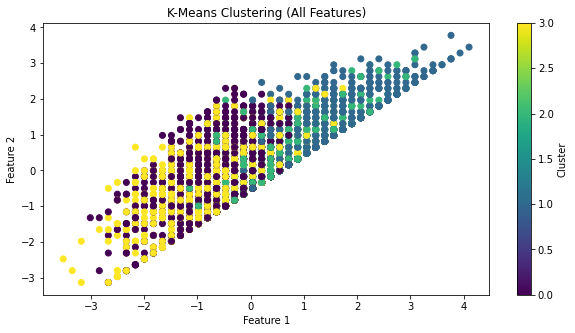

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 720x360 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt

# Visualization for clustering using all features
plt.figure(figsize=(10, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=all_clusters, cmap='viridis')
plt.title("K-Means Clustering (All Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# Visualization for clustering using player stats
plt.figure(figsize=(10, 5))
plt.scatter(player_stats_data[:, 0], player_stats_data[:, 1], c=player_stats_clusters, cmap='viridis')
plt.title("K-Means Clustering (Player Stats)")
plt.xlabel("Player Stat 1")
plt.ylabel("Player Stat 2")
plt.colorbar(label="Cluster")
plt.show()


### Finding the optimal number of clusters using the elbow method.